# Avaliação de desempenho

## Imports

In [5]:
import pandas as pd
import numpy as np
import json


## Parâmetros e configurações

In [212]:
level = 'l2'
path_acc = 'dados/sa23z_acc_mapbiomas_80_2022.csv'
path_class_settings = 'dados/config_classes.json'
path_strata = 'dados/strata.csv'

## Entrada de dados

Arquivo com os dados de classificação e os dados de referencia de 2022, gerado no google earth engine:

https://code.earthengine.google.com/365963f4785378c21da4b24fa43061fb

so adicionado como limite o grupode de cartas SA-23-Z

In [226]:
df_acc = pd.read_csv(path_acc)
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,NEW_WEIGHT,PESO_VOT,PROB_AMOS2,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,55301.697925,0.000014,0.000014,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,60305.967634,0.000014,0.000014,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,60305.967634,0.000014,0.000014,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,60305.967634,0.000014,0.000014,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,60305.967634,0.000014,0.000014,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"


apenas as amostras SA23-Z

In [227]:
df_acc.shape

(712, 20)

Configuracao com as classes

In [228]:
with open(path_class_settings, 'r') as arquivo:
    config_classes = json.load(arquivo)
config_classes['IGNORED_CLASSES']

[0, 31, 32, 30, 25, 23, 5, 29]

Para não ignorar essas classes:

In [229]:
config_classes['IGNORED_CLASSES'] = [0]
config_classes['IGNORED_CLASSES']

[0]

Aqui, não irei usar o arquivo points_strata.csv, pois os dados do target_id estao errados na coleção das amostras

pegarei apenas o dadoq que tem a populacao por estrato

In [230]:
df_strata = pd.read_csv(path_strata)
df_strata.head()

,strata_id,pop
0,SH-21-Z_D1,22049360.0
1,SI-22-V_D1,19367713.0
2,SF-24-V_D1,4483278.0
3,SF-23-Z_D1,3193040.0
4,SC-24-Z_D1,18863275.0


In [231]:
df_strata.shape ## todas os estratos

(762, 2)

## Tratamento de dados

### Gerando a coluna strata_id

como os estrato id estao errados nos dados que tive acesso no mapbiomas, vou criar o estrato id com base no dado do estrato e da declividade

In [232]:
df_acc['strata_id'] = df_acc["CARTA_2"] + "_" + df_acc["DECLIVIDAD"]

verificando os estratos

In [233]:
df_acc["strata_id"].unique()

array(['SA-23-Z_D2', 'SA-23-Z_D1', 'SA-23-Z_D3', 'SA-23-Z_D4',
       'SA-23-Z_D6', 'SA-23-Z_D5'], dtype=object)

### Pegando os dados dado da populacao

In [234]:
df_acc = pd.merge(df_acc, df_strata, how='inner', on="strata_id")
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,PROB_AMOS2,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,...,0.000014,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,0.000014,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,...,0.000014,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,0.000014,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,...,0.000014,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0


In [235]:
df_acc['pop'].head()

0    27861902.0
1    25366123.0
2    25366123.0
3    25366123.0
4    25366123.0
Name: pop, dtype: float64

### Pegando a quantidade de amostras por estrato

contar a quantidade de amostras por estrato

<Axes: ylabel='strata_id'>

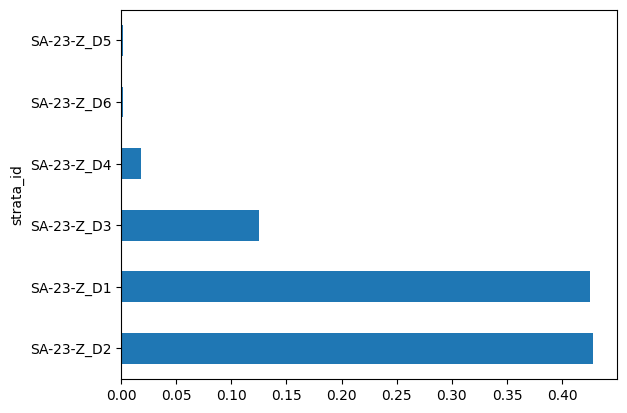

In [236]:
df_acc['strata_id'].value_counts(normalize=True).plot(kind='barh')

In [237]:
df_qt_samples = df_acc['strata_id'].value_counts().reset_index(name='n_samp')
df_qt_samples

,strata_id,n_samp
0,SA-23-Z_D2,305
1,SA-23-Z_D1,303
2,SA-23-Z_D3,89
3,SA-23-Z_D4,13
4,SA-23-Z_D6,1
5,SA-23-Z_D5,1


In [238]:
df_qt_samples.sum()

strata_id    SA-23-Z_D2SA-23-Z_D1SA-23-Z_D3SA-23-Z_D4SA-23-...
n_samp                                                     712
dtype: object

depois plotar um mapa os pontos por estrato

In [239]:
df_acc = pd.merge(df_acc, df_qt_samples, on='strata_id')
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop,n_samp
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,...,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,...,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,...,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303


verificar se esta ok numero de amostras e populacao

In [240]:
df_acc.columns

Index(['system:index', 'AMOSTRAS', 'AMOSTRA_AM', 'BioNB', 'CARTA_2',
       'CLASS_2022', 'DECLIVIDAD', 'LAT', 'LON', 'NEW_PROB', 'NEW_WEIGHT',
       'PESO_VOT', 'PROB_AMOS2', 'StateNB', 'TARGETID', 'VAL_PESO',
       'classification', 'reference', 'year', '.geo', 'strata_id', 'pop',
       'n_samp'],
      dtype='object')

In [241]:
df_contagem = df_acc.groupby("strata_id")[['n_samp','pop', 'PROB_AMOS2']].first()
df_contagem

,n_samp,pop,PROB_AMOS2
strata_id,,,
SA-23-Z_D1,303,25366123.0,0.000014
SA-23-Z_D2,305,27861902.0,0.000014
SA-23-Z_D3,89,7842002.0,0.000014
SA-23-Z_D4,13,1111132.0,0.000014
SA-23-Z_D5,1,4130.0,0.000242
SA-23-Z_D6,1,2744.0,0.000364


checando a probabilidade

In [242]:
df_contagem["prob_calc"] = df_contagem['n_samp'] / df_contagem['pop']
df_contagem

,n_samp,pop,PROB_AMOS2,prob_calc
strata_id,,,,
SA-23-Z_D1,303,25366123.0,0.000014,0.000012
SA-23-Z_D2,305,27861902.0,0.000014,0.000011
SA-23-Z_D3,89,7842002.0,0.000014,0.000011
SA-23-Z_D4,13,1111132.0,0.000014,0.000012
SA-23-Z_D5,1,4130.0,0.000242,0.000242
SA-23-Z_D6,1,2744.0,0.000364,0.000364


In [243]:
df_contagem.sum()

n_samp        7.120000e+02
pop           6.218803e+07
PROB_AMOS2    6.632598e-04
prob_calc     6.525031e-04
dtype: float64

### Calculo da probabilidade

a probabilidade, que é a quantidade de amostras sobre a populacão, e esta salva com ajustes de acordo com o voto em peso_voto

ver os valores antes desse ajuste

In [244]:
df_acc['PESO_VOT'].describe()

count    712.000000
mean       0.000008
std        0.000008
min        0.000005
25%        0.000005
50%        0.000007
75%        0.000007
max        0.000182
Name: PESO_VOT, dtype: float64

In [245]:
biomes = df_acc['BioNB'].unique()
biomes

array([1, 4])

acho que é feito por biomas, pq em alguns biomas eles usam dados da validacao no treinamento

aqui eu corrigi o codigo que estava em  https://github.com/mapbiomas-brazil/accuraccy/blob/mapbiomas80/src/estimates_codes/2_accuracy_estimates.py, para de fato excluir as amostras que foram usadas no treinamento. La nao esta excluindo por erro de digitacao, 'treinamento'

In [246]:
for biome in biomes:
        print ("biome", biome)
        biome_filter = (df_acc['BioNB'] == biome)
        n_samples, _ = df_acc[biome_filter & (df_acc['AMOSTRAS'] != 'Treinamento')].shape
        t_samples, _ = df_acc[biome_filter].shape
        print ("amostras sem treinamento", n_samples, "amostras com treinamento", t_samples)
        prob_biome_adjs = n_samples / t_samples
        df_acc.loc[biome_filter, 'PESO_VOT'] = df_acc[biome_filter]['PESO_VOT'] * prob_biome_adjs

biome 1
amostras sem treinamento 181 amostras com treinamento 247
biome 4
amostras sem treinamento 449 amostras com treinamento 465


In [247]:
#df_acc = df_acc[df_acc['AMOSTRAS'] != 'Treinamento']

In [248]:
df_acc['PESO_VOT'].describe()

count    712.000000
mean       0.000007
std        0.000006
min        0.000003
25%        0.000005
50%        0.000005
75%        0.000007
max        0.000134
Name: PESO_VOT, dtype: float64

### Atualiza o nome dos biomas, para texto

In [249]:
df_acc.loc[ (df_acc['BioNB']==1),'BioNB'] = 'Amazônia'
df_acc.loc[ (df_acc['BioNB']==2),'BioNB'] = 'Mata Atlântica'
df_acc.loc[ (df_acc['BioNB']==3),'BioNB'] = 'Pantanal'
df_acc.loc[ (df_acc['BioNB']==4),'BioNB'] = 'Cerrado'
df_acc.loc[ (df_acc['BioNB']==5),'BioNB'] = 'Caatinga'
df_acc.loc[ (df_acc['BioNB']==6),'BioNB'] = 'Pampa'

/tmp/ipykernel_671205/3599183855.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Amazônia' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_acc.loc[ (df_acc['BioNB']==1),'BioNB'] = 'Amazônia'


In [250]:
df_acc['BioNB'].unique()

array(['Amazônia', 'Cerrado'], dtype=object)

### Atualizando os codigos das classes de acordo com o nivel, e outros ajustes

#### Converte codigos das classe

In [251]:
df_acc['classification'].value_counts().sort_index()

classification
3     290
4     104
5      32
6      29
9       3
11     61
12     10
15     92
21     18
23     14
24     10
25      5
32      5
33     26
39     12
41      1
Name: count, dtype: int64

In [252]:
df_acc['reference'].value_counts().sort_index()

reference
3     300
4     117
5      17
9       4
11     59
12     22
15    115
19     14
23     18
24     10
25      1
32      3
33     20
50     12
Name: count, dtype: int64

Observando a classificacao e a reference, observamos algumas classes que aparece em uma e nao na outra, porém a funcao de convert_class corrige algumas, provavelmente pq mudaram se os codigos de algumas destas. pesquisar melhor


classificacao

6 - Floresta Alagável (nivel 2)

21 - mosaico de usos (nivel 2)

39 - Soja (nivel 3)

41 - Outras Lavouras Temporárias (nivel 3)

reference

19 - Lavoura Temporária (nivel 3)

50 - Restinga Herbácea

In [253]:
def convert_class(df):

    #Global

    df.loc[ (df['classification'] == 20) | (df['classification'] == 39) | (df['classification'] == 40) | (df['classification'] == 41) | (df['classification'] == 62), 'classification'] = 19 #Convert areas mapped as 20,39,40,41 to 19
    df.loc[ (df['classification'] == 46) | (df['classification'] == 47) | (df['classification'] == 48), 'classification'] = 36 #Convert areas mapped as 46,47,48 to 36
    df.loc[ (df['classification'] == 51) | (df['classification'] == 52) | (df['classification'] == 53), 'classification'] = 24 #Convert areas mapped as 20,39,41 to 24
    df.loc[ (df['classification'] == 49), 'classification'] = 3 #Convert areas mapped as 54,55,56 to 33
    df.loc[ (df['classification'] == 50), 'classification'] = 13 #Convert areas mapped as 54,55,56 to 33
    df.loc[ (df['classification'] == 54) | (df['classification'] == 55) | (df['classification'] == 56), 'classification'] = 33 #Convert areas mapped as 54,55,56 to 33
    df.loc[ (df['classification'] == 21) & (df['reference'].isin([15,19,20,36])), 'reference'] = 21 #Convert reference from 15,19,20,36 to reference 21 for areas mapped as 21
    df.loc[ (df['classification'] == 63), 'classification'] = 33    

    #Pampa 

    df.loc[ (df['BioNB']== 'Pampa') & (df['reference'] == 15),'reference'] = 19 #In Pampa, convert reference class 15 to 19 (Crop).
    df.loc[ (df['BioNB']=='Pampa') & (df['classification'] == 25) & (df['reference'] == 23), 'reference'] = 25 #In Pampa, convert reference 25 to 23 in areas mapped as 25
    df.loc[ (df['BioNB']== 'Pampa') & (df['classification'] == 12) & (df['reference'] == 13),'reference'] = 12 #In Pampa, convert reference 13 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']== 'Pampa') & (df['classification'] == 13),'classification'] = 12 #In Pampa, convert reference 13 to 12 in areas mapped as 12

    #Mata Atântica

    df.loc[ (df['BioNB']== 'Mata Atlântica') & (df['classification'] == 11) & (df['reference'] == 13),'reference'] = 11

    #Pantanal

    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 11) & (df['reference'] == 12),'reference'] = 11 #In Pantanal, convert reference 12 to 11 in areas mapped as 11
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 11) & (df['reference'] == 33),'reference'] = 11 #In Pantanal, convert reference 33 to 11 in areas mapped as 11
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 12) & (df['reference'] == 33),'reference'] = 12 #In Pantanal, convert reference 33 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 12) & (df['reference'] == 11),'reference'] = 12 #NEW!#In Pantanal, convert reference 33 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 33) & (df['reference'] == 11),'classification'] = 11 #In Pantanal, convert reference 33 to 11 in areas mapped as 11
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 33) & (df['reference'] == 12),'classification'] = 12 #In Pantanal, convert reference 33 to 12 in areas mapped as 12

    #Amazônia

    df.loc[ (df['BioNB']=='Amazônia') & (df['classification'] == 12) & (df['reference'] == 13), 'reference'] = 12 #In Amazon, convert reference 13 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']=='Amazônia') & (df['classification'] == 4) & (df['reference'] == 13), 'reference'] = 4 #In Amazon, convert reference 13 to 4 in areas mapped as 4

    #Cerrado

    df.loc[ (df['BioNB']=='Cerrado') & (df['reference'] == 11),'reference'] = 12
    df.loc[ (df['BioNB']=='Cerrado') & (df['classification'] == 11),'classification'] = 12 
    df.loc[ (df['BioNB']=='Cerrado') & (df['classification'] == 12)  & (df['reference'] == 13), 'reference'] = 12 #In Cerrado, convert reference 13 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']=='Cerrado') & (df['classification'] == 25) & (df['reference'] == 23), 'reference'] = 25 #In Cerrado, convert reference 25 to 23 in areas mapped as 25

    return df

In [254]:
df_acc = convert_class(df_acc)

In [255]:
df_acc['classification'].value_counts().sort_index()

classification
3     290
4     104
5      32
6      29
9       3
11     59
12     12
15     92
19     13
21     18
23     14
24     10
25      5
32      5
33     26
Name: count, dtype: int64

In [256]:
df_acc['reference'].value_counts().sort_index()

reference
3     300
4     117
5      17
9       4
11     55
12     26
15    106
19     13
21     10
23     14
24     10
25      5
32      3
33     20
50     12
Name: count, dtype: int64

Observando a classificacao e a reference, observamos algumas classes que aparece em uma e nao na outra:

- 50 - Restinga Herbácea aparece apenas na referencia
- 6 - Floresta Alagável aparece apenas na classificacao

#### Atualizando os codigo por nível

mudei o codigo original, agora eu pego todas as classes, nao apenas as que aparece em ambos

In [257]:
def get_classes(df3, config_classes, level='l3'):
    #print ("ok")
    
    df = df3.copy(deep=True)

    class_values = {}
    class_names = {}

    all_classes = config_classes['ALL_CLASSES']
    ignored_classes = config_classes['IGNORED_CLASSES']


    clas_classes = pd.Index(df['classification'].unique())
    ref_classes = pd.Index(df['reference'].unique())
    print ('clas_classes quant', len(clas_classes))
    print ('refclass quant', len(clas_classes))
    
    # acho errado isso, eles estao removendo informações
    #acc_classes =clas_classes.intersection(ref_classes)
    acc_classes =clas_classes.union(ref_classes)
    
    print ("union", acc_classes)
    print ("difference",clas_classes.difference(ref_classes))
    print ("difference",ref_classes.difference(clas_classes))

    val_remap = {}

    for value_str in all_classes.keys():
        value = int(value_str) # dado que estou usando um arquivo json

        '''
        classes removidas
        31 - Aquicultura
        32 - Apicum
        30 - Mineração
        25 - Outras Áreas não Vegetadas
        23 - Praia, Duna e Areal 
        5 - Mangue
        29 - Afloramento Rochoso

        '''
        if (value not in ignored_classes and (value in acc_classes)):
            
            val_key = "%s_val" % (level)
            new_val = all_classes[value_str][val_key]
            class_name = all_classes[value_str][level]

            val_remap[value] = new_val
            class_values[new_val] = True
            class_names[class_name] = True

    #print (val_remap.keys())
    #print ("size 1", df.shape)
    df = df[df['classification'].isin(val_remap.keys())]
    #print ("size 2", df.shape)
    df = df[df['reference'].isin(val_remap.keys())]
    print ("final size", df.shape)

    df['classification'] = df['classification'].map(val_remap)
    df['reference'] = df['reference'].map(val_remap)

    class_values = list(class_values.keys())
    class_names = list(class_names.keys())

    return df, class_values, class_names


In [258]:
config_classes['IGNORED_CLASSES']

[0]

In [259]:
df_acc, class_values, class_names = get_classes(df_acc, config_classes, level)
df_acc.head()

clas_classes quant 15
refclass quant 15
union Index([3, 4, 5, 6, 9, 11, 12, 15, 19, 21, 23, 24, 25, 32, 33, 50], dtype='int64')
difference Index([6], dtype='int64')
difference Index([50], dtype='int64')
final size (712, 23)


,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop,n_samp
0,0000000000000000508d_0,NaN,0,Amazônia,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,...,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305
1,00000000000000004b0e_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
2,00000000000000004b0f_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,...,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
3,00000000000000004b1b_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
4,00000000000000004b26_0,Treinamento,1,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,...,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303


In [294]:
df_acc.shape

(712, 23)

In [293]:
len(class_names)

16

#### Pegando os dados das classes

In [295]:
df_by_class = pd.DataFrame ( {
    'Class_Names' : class_names,
    'Class_Values' : class_values
}).set_index('Class_Values')
df_by_class

,Class_Names
Class_Values,
3,1.1. Formação Florestal
4,1.2. Formação Savânica
5,1.3. Mangue
6,1.4. Floresta Alagável (beta)
9,3.3. Floresta Plantada
11,2.1. Campo Alagado e Área Pantanosa
12,2.2. Formação Campestre (Campo)
15,3.1. Pastagem
18,3.2. Agricultura


In [296]:
df_by_class['qt_class'] = df_acc['classification'].value_counts()
df_by_class

,Class_Names,qt_class
Class_Values,,
3,1.1. Formação Florestal,290.0
4,1.2. Formação Savânica,104.0
5,1.3. Mangue,32.0
6,1.4. Floresta Alagável (beta),29.0
9,3.3. Floresta Plantada,3.0
11,2.1. Campo Alagado e Área Pantanosa,59.0
12,2.2. Formação Campestre (Campo),12.0
15,3.1. Pastagem,92.0
18,3.2. Agricultura,13.0


In [297]:
df_by_class['qt_reference'] = df_acc['reference'].value_counts()

In [298]:
df_by_class

,Class_Names,qt_class,qt_reference
Class_Values,,,
3,1.1. Formação Florestal,290.0,300.0
4,1.2. Formação Savânica,104.0,117.0
5,1.3. Mangue,32.0,17.0
6,1.4. Floresta Alagável (beta),29.0,NaN
9,3.3. Floresta Plantada,3.0,4.0
11,2.1. Campo Alagado e Área Pantanosa,59.0,55.0
12,2.2. Formação Campestre (Campo),12.0,26.0
15,3.1. Pastagem,92.0,106.0
18,3.2. Agricultura,13.0,13.0


aqui, vou substituir os nas por zero, ja que é zero a quantidade de classificados

In [299]:
df_by_class.fillna(0, inplace=True)
df_by_class

,Class_Names,qt_class,qt_reference
Class_Values,,,
3,1.1. Formação Florestal,290.0,300.0
4,1.2. Formação Savânica,104.0,117.0
5,1.3. Mangue,32.0,17.0
6,1.4. Floresta Alagável (beta),29.0,0.0
9,3.3. Floresta Plantada,3.0,4.0
11,2.1. Campo Alagado e Área Pantanosa,59.0,55.0
12,2.2. Formação Campestre (Campo),12.0,26.0
15,3.1. Pastagem,92.0,106.0
18,3.2. Agricultura,13.0,13.0


In [267]:
df_by_class.sort_values('qt_class', ascending=False)

,Class_Names,qt_class,qt_reference
Class_Values,,,
3,1.1. Formação Florestal,290.0,300.0
4,1.2. Formação Savânica,104.0,117.0
15,3.1. Pastagem,92.0,106.0
11,2.1. Campo Alagado e Área Pantanosa,59.0,55.0
5,1.3. Mangue,32.0,17.0
6,1.4. Floresta Alagável (beta),29.0,0.0
33,"5.1. Rio, Lago e Oceano",26.0,20.0
21,3.4. Mosaico de Usos,18.0,10.0
23,4.1. Praia e Duna,14.0,14.0


#### Formatacao

In [300]:
df_by_class_formatar = df_by_class.copy(deep=True)

In [301]:
df_by_class_formatar.columns = ['Classe', 'Quantidade Classificada', 'Quantidade de Referência']
df_by_class_formatar.index.name = 'id'

In [302]:
df_by_class_formatar

,Classe,Quantidade Classificada,Quantidade de Referência
id,,,
3,1.1. Formação Florestal,290.0,300.0
4,1.2. Formação Savânica,104.0,117.0
5,1.3. Mangue,32.0,17.0
6,1.4. Floresta Alagável (beta),29.0,0.0
9,3.3. Floresta Plantada,3.0,4.0
11,2.1. Campo Alagado e Área Pantanosa,59.0,55.0
12,2.2. Formação Campestre (Campo),12.0,26.0
15,3.1. Pastagem,92.0,106.0
18,3.2. Agricultura,13.0,13.0


In [303]:
df_by_class_formatar.loc[[3,4]]['Quantidade Classificada'].sum() / df_by_class_formatar['Quantidade Classificada'].sum()

np.float64(0.5533707865168539)

<Axes: ylabel='id'>

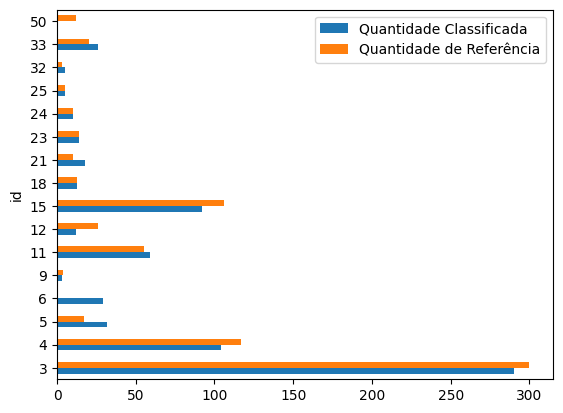

In [304]:
df_by_class_formatar.plot(kind='barh')

In [305]:
s_by_class = df_by_class_formatar.style
s_by_class

,Classe,Quantidade Classificada,Quantidade de Referência
id,,,
3,1.1. Formação Florestal,290.000000,300.000000
4,1.2. Formação Savânica,104.000000,117.000000
5,1.3. Mangue,32.000000,17.000000
6,1.4. Floresta Alagável (beta),29.000000,0.000000
9,3.3. Floresta Plantada,3.000000,4.000000
11,2.1. Campo Alagado e Área Pantanosa,59.000000,55.000000
12,2.2. Formação Campestre (Campo),12.000000,26.000000
15,3.1. Pastagem,92.000000,106.000000
18,3.2. Agricultura,13.000000,13.000000


## Analise da acuracia

### Preparação das variáveis usadas para calcular

In [306]:
from sklearn.metrics import confusion_matrix

In [307]:
y_true = df_acc[['reference']].to_numpy().flatten()
y_pred = df_acc[['classification']].to_numpy().flatten()

verificar se existe classes em uma e nao na outra

In [308]:
set(y_pred) - set (y_true)

{np.int64(6)}

In [309]:
set(y_true) - set (y_pred)

{np.int64(50)}

In [310]:
matrix_sem_peso = confusion_matrix(y_true, y_pred).T
print (matrix_sem_peso)

[[225  34   1   0   0   0   3  23   1   0   0   0   0   1   2   0]
 [ 12  69   0   0   1   0   4   8   0   0   0   0   0   0   0  10]
 [ 18   0  14   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   2   0   0   5   0   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0  38   7   6   0   0   0   0   0   0   0   0]
 [  0   6   0   0   0   0   1   2   0   0   0   0   0   1   1   1]
 [ 16   4   0   0   0   3   6  61   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   1  12   0   0   0   0   0   0   0]
 [  1   4   0   0   0   0   3   0   0  10   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   8   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0   3   1   0   0   0   0   0   0   1   0   0]
 [  2   0   0   0   0   6   1   0   0   0   0   0   0   0  17 

In [311]:
matrix_sem_peso.diagonal().sum() / matrix_sem_peso.sum()

np.float64(0.6713483146067416)

In [312]:
total = matrix_sem_peso.sum()
total

np.int64(712)

In [313]:
classes_index = list (set(y_true).union(set (y_pred)))
classes_index

[np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(9),
 np.int64(11),
 np.int64(12),
 np.int64(15),
 np.int64(18),
 np.int64(21),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(32),
 np.int64(33),
 np.int64(50)]

In [314]:
df_matriz_confusao_qt = pd.DataFrame(matrix_sem_peso, index=classes_index, columns=classes_index)

#### Formatacao para artigo

In [315]:
df_matriz_confusao_qt['Total Classificado'] = df_matriz_confusao_qt.sum(axis=1)
df_matriz_confusao_qt

,3,4,5,6,9,11,12,15,18,21,23,24,25,32,33,50,Total Classificado
3,225,34,1,0,0,0,3,23,1,0,0,0,0,1,2,0,290
4,12,69,0,0,1,0,4,8,0,0,0,0,0,0,0,10,104
5,18,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,32
6,18,0,2,0,0,5,0,4,0,0,0,0,0,0,0,0,29
9,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3
11,8,0,0,0,0,38,7,6,0,0,0,0,0,0,0,0,59
12,0,6,0,0,0,0,1,2,0,0,0,0,0,1,1,1,12
15,16,4,0,0,0,3,6,61,0,0,0,2,0,0,0,0,92
18,0,0,0,0,0,0,0,1,12,0,0,0,0,0,0,0,13
21,1,4,0,0,0,0,3,0,0,10,0,0,0,0,0,0,18


In [316]:
df_matriz_confusao_qt.loc['Total Referência'] = df_matriz_confusao_qt.sum(axis=0)

In [317]:
df_matriz_confusao_qt

,3,4,5,6,9,11,12,15,18,21,23,24,25,32,33,50,Total Classificado
3,225,34,1,0,0,0,3,23,1,0,0,0,0,1,2,0,290
4,12,69,0,0,1,0,4,8,0,0,0,0,0,0,0,10,104
5,18,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,32
6,18,0,2,0,0,5,0,4,0,0,0,0,0,0,0,0,29
9,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3
11,8,0,0,0,0,38,7,6,0,0,0,0,0,0,0,0,59
12,0,6,0,0,0,0,1,2,0,0,0,0,0,1,1,1,12
15,16,4,0,0,0,3,6,61,0,0,0,2,0,0,0,0,92
18,0,0,0,0,0,0,0,1,12,0,0,0,0,0,0,0,13
21,1,4,0,0,0,0,3,0,0,10,0,0,0,0,0,0,18


In [318]:
style_matriz_peso_qt = df_matriz_confusao_qt.style
style_matriz_peso_qt

,3,4,5,6,9,11,12,15,18,21,23,24,25,32,33,50,Total Classificado
3,225,34,1,0,0,0,3,23,1,0,0,0,0,1,2,0,290
4,12,69,0,0,1,0,4,8,0,0,0,0,0,0,0,10,104
5,18,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,32
6,18,0,2,0,0,5,0,4,0,0,0,0,0,0,0,0,29
9,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3
11,8,0,0,0,0,38,7,6,0,0,0,0,0,0,0,0,59
12,0,6,0,0,0,0,1,2,0,0,0,0,0,1,1,1,12
15,16,4,0,0,0,3,6,61,0,0,0,2,0,0,0,0,92
18,0,0,0,0,0,0,0,1,12,0,0,0,0,0,0,0,13
21,1,4,0,0,0,0,3,0,0,10,0,0,0,0,0,0,18


In [319]:
style_matriz_peso_qt.apply(lambda x: ['background-color: gray' if x.name == col else '' for col in x.index], axis=1)

,3,4,5,6,9,11,12,15,18,21,23,24,25,32,33,50,Total Classificado
3,225,34,1,0,0,0,3,23,1,0,0,0,0,1,2,0,290
4,12,69,0,0,1,0,4,8,0,0,0,0,0,0,0,10,104
5,18,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,32
6,18,0,2,0,0,5,0,4,0,0,0,0,0,0,0,0,29
9,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3
11,8,0,0,0,0,38,7,6,0,0,0,0,0,0,0,0,59
12,0,6,0,0,0,0,1,2,0,0,0,0,0,1,1,1,12
15,16,4,0,0,0,3,6,61,0,0,0,2,0,0,0,0,92
18,0,0,0,0,0,0,0,1,12,0,0,0,0,0,0,0,13
21,1,4,0,0,0,0,3,0,0,10,0,0,0,0,0,0,18


In [320]:
file = open ('tmp/saida.html','w')
file.write(style_matriz_peso_qt.to_html())

22504

### Matriz Sem Área

In [321]:
total, _ = df_acc.shape
total

712

In [322]:
pd.DataFrame ((confusion_matrix(y_true, y_pred).T) ,  columns=class_names, index=class_names)

,1.1. Formação Florestal,1.2. Formação Savânica,1.3. Mangue,1.4. Floresta Alagável (beta),3.3. Floresta Plantada,2.1. Campo Alagado e Área Pantanosa,2.2. Formação Campestre (Campo),3.1. Pastagem,3.2. Agricultura,3.4. Mosaico de Usos,4.1. Praia e Duna,4.2. Infraestrutura Urbana,4.4. Outra Área não Vegetada,2.3. Apicum,"5.1. Rio, Lago e Oceano",2.5. Restinga Herbácea/Arbustiva
1.1. Formação Florestal,225,34,1,0,0,0,3,23,1,0,0,0,0,1,2,0
1.2. Formação Savânica,12,69,0,0,1,0,4,8,0,0,0,0,0,0,0,10
1.3. Mangue,18,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0
1.4. Floresta Alagável (beta),18,0,2,0,0,5,0,4,0,0,0,0,0,0,0,0
3.3. Floresta Plantada,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
2.1. Campo Alagado e Área Pantanosa,8,0,0,0,0,38,7,6,0,0,0,0,0,0,0,0
2.2. Formação Campestre (Campo),0,6,0,0,0,0,1,2,0,0,0,0,0,1,1,1
3.1. Pastagem,16,4,0,0,0,3,6,61,0,0,0,2,0,0,0,0
3.2. Agricultura,0,0,0,0,0,0,0,1,12,0,0,0,0,0,0,0
3.4. Mosaico de Usos,1,4,0,0,0,0,3,0,0,10,0,0,0,0,0,0


In [323]:
df_matriz = pd.DataFrame ((confusion_matrix(y_true, y_pred).T) / total,  columns=class_names, index=class_names)
df_matriz

,1.1. Formação Florestal,1.2. Formação Savânica,1.3. Mangue,1.4. Floresta Alagável (beta),3.3. Floresta Plantada,2.1. Campo Alagado e Área Pantanosa,2.2. Formação Campestre (Campo),3.1. Pastagem,3.2. Agricultura,3.4. Mosaico de Usos,4.1. Praia e Duna,4.2. Infraestrutura Urbana,4.4. Outra Área não Vegetada,2.3. Apicum,"5.1. Rio, Lago e Oceano",2.5. Restinga Herbácea/Arbustiva
1.1. Formação Florestal,0.316011,0.047753,0.001404,0.0,0.000000,0.000000,0.004213,0.032303,0.001404,0.000000,0.000000,0.000000,0.000000,0.001404,0.002809,0.000000
1.2. Formação Savânica,0.016854,0.096910,0.000000,0.0,0.001404,0.000000,0.005618,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014045
1.3. Mangue,0.025281,0.000000,0.019663,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.4. Floresta Alagável (beta),0.025281,0.000000,0.002809,0.0,0.000000,0.007022,0.000000,0.005618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.3. Floresta Plantada,0.000000,0.000000,0.000000,0.0,0.004213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.1. Campo Alagado e Área Pantanosa,0.011236,0.000000,0.000000,0.0,0.000000,0.053371,0.009831,0.008427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.2. Formação Campestre (Campo),0.000000,0.008427,0.000000,0.0,0.000000,0.000000,0.001404,0.002809,0.000000,0.000000,0.000000,0.000000,0.000000,0.001404,0.001404,0.001404
3.1. Pastagem,0.022472,0.005618,0.000000,0.0,0.000000,0.004213,0.008427,0.085674,0.000000,0.000000,0.000000,0.002809,0.000000,0.000000,0.000000,0.000000
3.2. Agricultura,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.001404,0.016854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.4. Mosaico de Usos,0.001404,0.005618,0.000000,0.0,0.000000,0.000000,0.004213,0.000000,0.000000,0.014045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Calculo da acuracia

In [358]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [334]:
total = df_matriz.sum().sum()
total

np.float64(1.0)

In [325]:
concordancia = np.diag(df_matriz.values)
concordancia

array([0.31601124, 0.09691011, 0.01966292, 0.        , 0.00421348,
       0.05337079, 0.00140449, 0.08567416, 0.01685393, 0.01404494,
       0.01966292, 0.01123596, 0.00702247, 0.00140449, 0.0238764 ,
       0.        ])

In [326]:
total_class= df_matriz.sum(axis=1)
total_class

1.1. Formação Florestal                0.407303
1.2. Formação Savânica                 0.146067
1.3. Mangue                            0.044944
1.4. Floresta Alagável (beta)          0.040730
3.3. Floresta Plantada                 0.004213
2.1. Campo Alagado e Área Pantanosa    0.082865
2.2. Formação Campestre (Campo)        0.016854
3.1. Pastagem                          0.129213
3.2. Agricultura                       0.018258
3.4. Mosaico de Usos                   0.025281
4.1. Praia e Duna                      0.019663
4.2. Infraestrutura Urbana             0.014045
4.4. Outra Área não Vegetada           0.007022
2.3. Apicum                            0.007022
5.1. Rio, Lago e Oceano                0.036517
2.5. Restinga Herbácea/Arbustiva       0.000000
dtype: float64

In [327]:
total_ref = df_matriz.sum(axis=0)
total_ref

1.1. Formação Florestal                0.421348
1.2. Formação Savânica                 0.164326
1.3. Mangue                            0.023876
1.4. Floresta Alagável (beta)          0.000000
3.3. Floresta Plantada                 0.005618
2.1. Campo Alagado e Área Pantanosa    0.077247
2.2. Formação Campestre (Campo)        0.036517
3.1. Pastagem                          0.148876
3.2. Agricultura                       0.018258
3.4. Mosaico de Usos                   0.014045
4.1. Praia e Duna                      0.019663
4.2. Infraestrutura Urbana             0.014045
4.4. Outra Área não Vegetada           0.007022
2.3. Apicum                            0.004213
5.1. Rio, Lago e Oceano                0.028090
2.5. Restinga Herbácea/Arbustiva       0.016854
dtype: float64

In [328]:
total_concordancia  = concordancia.sum()
total_concordancia

np.float64(0.6713483146067416)

#### Acuracia Global

In [329]:
AG = total_concordancia
AG

np.float64(0.6713483146067416)

#### Erro Global

In [330]:
EG = 1 - AG
EG

np.float64(0.3286516853932584)

#### Acuracia do consumidor e erros de comissao

In [331]:
AC = concordancia / total_class
AC.sort_values(ascending=False)

3.3. Floresta Plantada                 1.000000
4.4. Outra Área não Vegetada           1.000000
4.1. Praia e Duna                      1.000000
3.2. Agricultura                       0.923077
4.2. Infraestrutura Urbana             0.800000
1.1. Formação Florestal                0.775862
1.2. Formação Savânica                 0.663462
3.1. Pastagem                          0.663043
5.1. Rio, Lago e Oceano                0.653846
2.1. Campo Alagado e Área Pantanosa    0.644068
3.4. Mosaico de Usos                   0.555556
1.3. Mangue                            0.437500
2.3. Apicum                            0.200000
2.2. Formação Campestre (Campo)        0.083333
1.4. Floresta Alagável (beta)          0.000000
2.5. Restinga Herbácea/Arbustiva            NaN
dtype: float64

aqui estou fazendo o equivalente ao micro

In [332]:
concordancia.sum() / total_class.sum()

np.float64(0.6713483146067417)

Micro: Calcula a métrica globalmente.
Macro: Calcula a métrica para cada classe e depois tira a média.
Weighted: Calcula a métrica para cada classe e tira a média ponderada pelo suporte de cada classe.

In [359]:
precision_score(y_true, y_pred, average='micro')

np.float64(0.6713483146067416)

In [335]:
EC = 1 - AC
EC.sort_values(ascending=False)

1.4. Floresta Alagável (beta)          1.000000
2.2. Formação Campestre (Campo)        0.916667
2.3. Apicum                            0.800000
1.3. Mangue                            0.562500
3.4. Mosaico de Usos                   0.444444
2.1. Campo Alagado e Área Pantanosa    0.355932
5.1. Rio, Lago e Oceano                0.346154
3.1. Pastagem                          0.336957
1.2. Formação Savânica                 0.336538
1.1. Formação Florestal                0.224138
4.2. Infraestrutura Urbana             0.200000
3.2. Agricultura                       0.076923
3.3. Floresta Plantada                 0.000000
4.1. Praia e Duna                      0.000000
4.4. Outra Área não Vegetada           0.000000
2.5. Restinga Herbácea/Arbustiva            NaN
dtype: float64

In [336]:
1 - concordancia.sum() / total_class.sum()

np.float64(0.3286516853932583)

#### Acuracia do produtor e erros de omissao

In [338]:
AP = concordancia / total_ref
AP.sort_values(ascending=False)

4.4. Outra Área não Vegetada           1.000000
4.1. Praia e Duna                      1.000000
3.4. Mosaico de Usos                   1.000000
3.2. Agricultura                       0.923077
5.1. Rio, Lago e Oceano                0.850000
1.3. Mangue                            0.823529
4.2. Infraestrutura Urbana             0.800000
3.3. Floresta Plantada                 0.750000
1.1. Formação Florestal                0.750000
2.1. Campo Alagado e Área Pantanosa    0.690909
1.2. Formação Savânica                 0.589744
3.1. Pastagem                          0.575472
2.3. Apicum                            0.333333
2.2. Formação Campestre (Campo)        0.038462
2.5. Restinga Herbácea/Arbustiva       0.000000
1.4. Floresta Alagável (beta)               NaN
dtype: float64

In [360]:
concordancia.sum() / total_ref.sum()

np.float64(0.6713483146067416)

In [362]:
recall_score(y_true, y_pred, average='micro')

np.float64(0.6713483146067416)

In [339]:
EO = 1 - AP
EO

1.1. Formação Florestal                0.250000
1.2. Formação Savânica                 0.410256
1.3. Mangue                            0.176471
1.4. Floresta Alagável (beta)               NaN
3.3. Floresta Plantada                 0.250000
2.1. Campo Alagado e Área Pantanosa    0.309091
2.2. Formação Campestre (Campo)        0.961538
3.1. Pastagem                          0.424528
3.2. Agricultura                       0.076923
3.4. Mosaico de Usos                   0.000000
4.1. Praia e Duna                      0.000000
4.2. Infraestrutura Urbana             0.200000
4.4. Outra Área não Vegetada           0.000000
2.3. Apicum                            0.666667
5.1. Rio, Lago e Oceano                0.150000
2.5. Restinga Herbácea/Arbustiva       1.000000
dtype: float64

#### F1 Score

In [365]:
f1_score(y_true, y_pred, average='micro')

np.float64(0.6713483146067416)

#### Erro de quantidade (area disagrement)

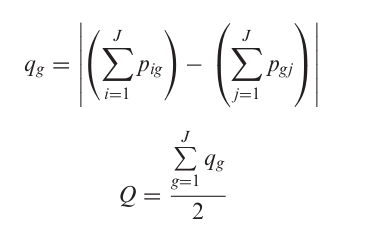

In [341]:
QD = (np.abs(total_ref - total_class)).sum() / 2
QD

np.float64(0.08988764044943823)

logo erro de alocação é 

In [342]:
EG - QD

np.float64(0.23876404494382017)

vamos aqui usar pela formula

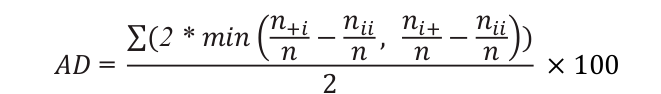

In [343]:
menor_diferenca = np.minimum((total_class - concordancia), (total_ref - concordancia))
menor_diferenca

1.1. Formação Florestal                0.091292
1.2. Formação Savânica                 0.049157
1.3. Mangue                            0.004213
1.4. Floresta Alagável (beta)          0.000000
3.3. Floresta Plantada                 0.000000
2.1. Campo Alagado e Área Pantanosa    0.023876
2.2. Formação Campestre (Campo)        0.015449
3.1. Pastagem                          0.043539
3.2. Agricultura                       0.001404
3.4. Mosaico de Usos                   0.000000
4.1. Praia e Duna                      0.000000
4.2. Infraestrutura Urbana             0.002809
4.4. Outra Área não Vegetada           0.000000
2.3. Apicum                            0.002809
5.1. Rio, Lago e Oceano                0.004213
2.5. Restinga Herbácea/Arbustiva       0.000000
dtype: float64

In [344]:
AD = ((menor_diferenca * 2).sum() / 2) 
AD

np.float64(0.23876404494382017)

## Indice Kappa

In [346]:
from sklearn.metrics import cohen_kappa_score

In [347]:
kappa = cohen_kappa_score(y_true, y_pred)
kappa

np.float64(0.5757436861163312)

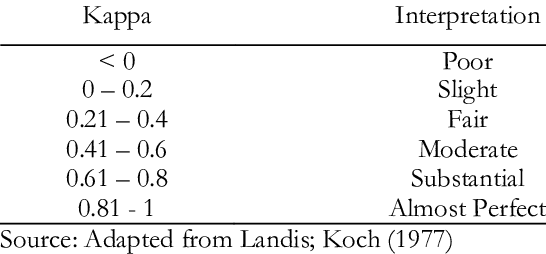